In [1]:
%load_ext rpy2.ipython

In [2]:
import pandas as pd
import scipy.io as io
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from matplotlib import gridspec
import seaborn as sns
import datetime
from datetime import datetime, timedelta
import pickle
import itertools
import glob

In [3]:
%%R
# install.packages("BayesFactor", repos='http://cran.us.r-project.org')

NULL


In [4]:
%%R
rm(list = ls())  #remove elements from current workspace

In [5]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

In [6]:
import matplotlib.dates as dates
from scipy import stats
import pingouin as pg
from scipy.stats import variation
import math
from sklearn import preprocessing
from scipy.signal import butter, filtfilt
import itertools

/home/srj34/jupyter-env/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [7]:
import matplotlib.pyplot as plt
#font = {'family': 'serif', 'serif': ['Palatino']}
font = {'family': 'serif', 'serif': ['Helvetica']}
plt.rc('font', **font)
plt.rc('text', usetex=False)

In [8]:
label_fontsize = 16
title_fontsize = 16

In [9]:
#Set up parameters for figure display
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'axes.labelweight': 'bold',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)
pylab.rcParams["font.family"] = "serif"
pylab.rcParams["font.weight"] = "heavy"
#pylab.rcParams.update({'figure.autolayout': True})

In [10]:
sns.set(font_scale=1.25, style="whitegrid")

In [11]:
base_dir = '/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/'
beh_files = 'decAlertnessDecisionmaking_JNeuroscience2021/beh_data/csv_files/'
output_dir = 'decAlertnessDecisionmaking_JNeuroscience2021/Figures/'

In [12]:
#read the csv file first (created by process_sdt)
sdt_file = 'sdt.csv'
sdt_data = pd.read_csv(base_dir + beh_files + sdt_file)

In [13]:
sdt_data.head()

,Subj_id,Condition,hit_rate,fa_rate,d_prime,criterion,beta
0,s_02,Alert,0.870968,0.016129,3.272176,0.505110,5.221630
1,s_02,Drowsy,0.751634,0.083871,2.059136,0.349928,2.055561
2,s_04,Alert,0.967742,0.241935,2.548687,-0.574253,0.231404
3,s_04,Drowsy,0.963636,0.272031,2.401221,-0.593928,0.240232
4,s_05,Alert,0.951613,0.112903,2.871930,-0.224733,0.524444


In [14]:
sdt_dprime = sdt_data[['Subj_id', 'Condition', 'd_prime']]
sdt_dprime = sdt_dprime.reset_index().pivot(columns='Condition', index='Subj_id', values='d_prime')
sdt_dprime.head()

Condition,Alert,Drowsy
Subj_id,,
s_02,3.272176,2.059136
s_04,2.548687,2.401221
s_05,2.871930,2.379015
s_06,2.046583,1.926936
s_07,2.389914,2.341749


In [15]:
sdt_criterion = sdt_data[['Subj_id', 'Condition', 'criterion']]
sdt_criterion = sdt_criterion.reset_index().pivot(columns='Condition', index='Subj_id', values='criterion')
sdt_criterion.head()

Condition,Alert,Drowsy
Subj_id,,
s_02,0.505110,0.349928
s_04,-0.574253,-0.593928
s_05,-0.224733,0.480405
s_06,0.034123,0.130492
s_07,-0.205788,-0.009414


In [16]:
import rpy2.robjects as robjects
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
pandas2ri.activate()

In [17]:
# import the data frames into the R workspace
robjects.globalenv["sdt_dprime"] = sdt_dprime
robjects.globalenv["sdt_criterion"] = sdt_criterion

In [18]:
%%R
head(sdt_dprime)

        Alert   Drowsy
s_02 3.272176 2.059136
s_04 2.548687 2.401221
s_05 2.871930 2.379015
s_06 2.046583 1.926936
s_07 2.389914 2.341749
s_09 2.918674 0.968737


In [19]:
#Perform stats on the different parameters..
[dprime_stat,dprime_pval] = stats.ttest_rel(sdt_dprime['Alert'], sdt_dprime['Drowsy'])
[criterion_stat,criterion_pval] = stats.ttest_rel(sdt_criterion['Alert'], sdt_criterion['Drowsy'])
print('Stats on dprime: t-val is ',round(dprime_stat,2), 'p_val is ',round(dprime_pval,4))
print('Stats on criterion: t-val is ',round(criterion_stat,2), 'p_val is ',round(criterion_pval,4))

Stats on dprime: t-val is  6.74 p_val is  0.0
Stats on criterion: t-val is  -2.04 p_val is  0.0499


In [20]:
res_dprime = pg.ttest(sdt_dprime['Alert'], sdt_dprime['Drowsy'], paired = True, correction='auto')
res_dprime

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,6.740358,31,two-sided,1.522069e-07,"[0.47, 0.88]",1.180738,1.011e+05,1.0


In [21]:
res_criterion = pg.ttest(sdt_criterion['Alert'], sdt_criterion['Drowsy'], paired = True, correction='auto')
res_criterion

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-2.040654,31,two-sided,0.04988,"[-0.28, -0.0]",0.314005,1.169,0.40578


In [22]:
fig_dir = base_dir + output_dir
fig_dir

'/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/decAlertnessDecisionmaking_JNeuroscience2021/Figures/'

In [23]:
pal = {Condition: "b" if Condition == 'Drowsy' else "r" for Condition in sdt_data.Condition.unique()}

In [24]:
def statannotation(ax, x1, x2, y,text):
    h = 0.05
    text_offset = 0.5
    
    line_x, line_y = [x1, x1, x2, x2], [y, y + h, y + h, y]

    ax.plot(line_x, line_y, lw=2, c='black')
    ann = ax.annotate(text, xy=(np.mean([x1, x2]), y + h),
                      xytext=(0, text_offset), textcoords='offset points',
                      xycoords='data', ha='center', va='bottom',
                      fontsize=label_fontsize-2, clip_on=False, annotation_clip=False)

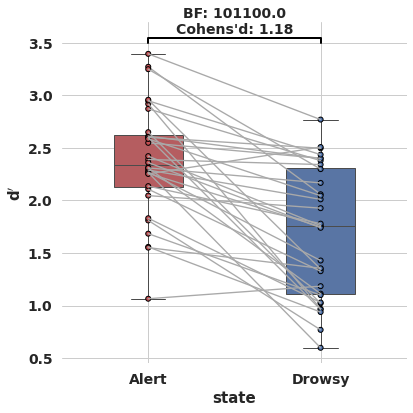

In [25]:
f, ax1 = plt.subplots(nrows =1, ncols=1, figsize=(6, 6))

string_val = 'BF: ' + str(np.round(float(res_dprime['BF10'].values[0]),2)) + \
              "\nCohens'd: " + str(np.round(res_dprime['cohen-d'].values[0],2))

statannotation(ax = ax1, x1 = 0, x2 = 1, y = 3.5, text = string_val)

ax2 = sns.pointplot(x="Condition",y="d_prime",hue='Subj_id',data=sdt_data,ax=ax1, dodge=0.0, scale = 0.5,
                    markers = '', palette=['darkgray'])

ax3 = sns.boxplot(x="Condition", y="d_prime", data=sdt_data, whis=np.inf, ax=ax1, width=0.4, showbox=True,
                  dodge=False,meanline=True,showmeans=False, showfliers=True,showcaps=True,palette=pal,
                  linewidth=1)
sns.stripplot(x="Condition", y="d_prime", data=sdt_data,jitter=False, linewidth=1, ax=ax1,
              edgecolor ="black",palette=pal)

ax1.legend_.remove()

ax1.set(xlabel='state', ylabel='d$^\prime$')


ax1.tick_params(axis='both', which='major', labelsize=label_fontsize-2)

plt.tight_layout()
plt.box(False)
plt.grid(True)

plt.savefig(fig_dir + "sdt_parameter_dprime" + ".png", format='png', dpi=240, transparent=False)

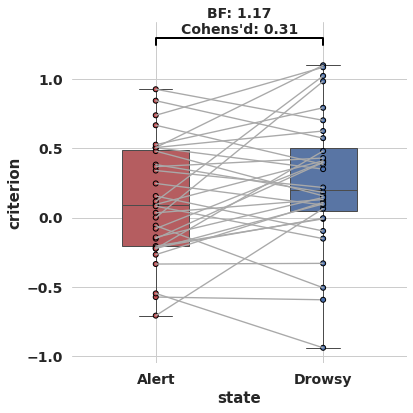

In [26]:
f, ax4 = plt.subplots(nrows =1, ncols=1, figsize=(6, 6))

string_val = 'BF: ' + str(np.round(float(res_criterion['BF10'].values[0]),2)) + \
              "\nCohens'd: " + str(np.round(res_criterion['cohen-d'].values[0],2))

statannotation(ax = ax4, x1 = 0, x2 = 1, y = 1.25, text = string_val)

ax5 = sns.pointplot(x="Condition",y="criterion",hue='Subj_id',data=sdt_data,ax=ax4, dodge=0.0, scale = 0.5,
                    markers = '', palette=['darkgray'])

ax6 = sns.boxplot(x="Condition", y="criterion", data=sdt_data, whis=np.inf, width=0.4, ax=ax4, showbox=True,
                  dodge=False,meanline=True,showmeans=False, showfliers=True,showcaps=True,palette=pal,
                  linewidth=1)
sns.stripplot(x="Condition", y="criterion", data=sdt_data,jitter=False, linewidth=1, ax=ax4,
              edgecolor ="black",palette=pal)

ax4.legend_.remove()

ax4.set(xlabel='state', ylabel='criterion')

sns.despine(left=True, bottom = True)

ax4.tick_params(axis='both', which='major', labelsize=label_fontsize-2)

plt.tight_layout()
plt.box(False)
plt.grid(True)

plt.savefig(fig_dir + "sdt_parameter_criterion" + ".png", format='png', dpi=240, transparent=False)